In [164]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
from sklearn.cluster import KMeans


In [165]:
df= pd.read_csv("C:/Users/hp/IIT_Internship/Gas_Sensors/Classification/Dataset/organised/1.Merged_Three_Mixtures_All_GasSensor/ZnO.csv",usecols=['Time','ZnO_Resist','Temp','CC_1','CC_2','VC','CC1_1_PPM','CC_2_PPM','VC_PPM','VC_Chloroform','VC_Acetone','VC_Ethanol','VC_Toluene'])

In [166]:
df.head()

,Time,ZnO_Resist,Temp,CC_1,CC_2,VC,CC1_1_PPM,CC_2_PPM,VC_PPM,VC_Chloroform,VC_Acetone,VC_Ethanol,VC_Toluene
0,2746.94541,2.460000e+06,200,Ethanol,Acetone,Chloroform,600,1000,1800,1,0,0,0
1,5197.40749,9.539493e+05,200,Chloroform,Toluene,Ethanol,1000,720,1200,0,0,1,0
2,3243.45217,1.700000e+06,200,Ethanol,Acetone,Toluene,900,1000,1800,0,0,0,1
3,8865.96084,1.150000e+06,200,Toluene,Acetone,Ethanol,720,600,1200,0,0,1,0
4,10061.97048,1.080000e+06,200,Toluene,Acetone,Ethanol,720,600,900,0,0,1,0


In [167]:
df['ZnO_Resist'] = pd.to_numeric(df['ZnO_Resist'],errors = 'coerce')

In [168]:
# Drop first column of dataframe
df = df.iloc[:, :]


In [169]:
df.head()


,Time,ZnO_Resist,Temp,CC_1,CC_2,VC,CC1_1_PPM,CC_2_PPM,VC_PPM,VC_Chloroform,VC_Acetone,VC_Ethanol,VC_Toluene
0,2746.94541,2.460000e+06,200,Ethanol,Acetone,Chloroform,600,1000,1800,1,0,0,0
1,5197.40749,9.539493e+05,200,Chloroform,Toluene,Ethanol,1000,720,1200,0,0,1,0
2,3243.45217,1.700000e+06,200,Ethanol,Acetone,Toluene,900,1000,1800,0,0,0,1
3,8865.96084,1.150000e+06,200,Toluene,Acetone,Ethanol,720,600,1200,0,0,1,0
4,10061.97048,1.080000e+06,200,Toluene,Acetone,Ethanol,720,600,900,0,0,1,0


In [170]:
df.columns


Index(['Time', 'ZnO_Resist', 'Temp', 'CC_1', 'CC_2', 'VC', 'CC1_1_PPM',
       'CC_2_PPM', 'VC_PPM', 'VC_Chloroform', 'VC_Acetone', 'VC_Ethanol',
       'VC_Toluene'],
      dtype='object')

In [171]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [172]:
df['CC_1']= label_encoder.fit_transform(df['CC_1'])
df['CC_2']= label_encoder.fit_transform(df['CC_2'])
df['VC']= label_encoder.fit_transform(df['VC'])

In [173]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131120 entries, 0 to 131119
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           131120 non-null  float64
 1   ZnO_Resist     131120 non-null  float64
 2   Temp           131120 non-null  int64  
 3   CC_1           131120 non-null  int32  
 4   CC_2           131120 non-null  int32  
 5   VC             131120 non-null  int32  
 6   CC1_1_PPM      131120 non-null  int64  
 7   CC_2_PPM       131120 non-null  int64  
 8   VC_PPM         131120 non-null  int64  
 9   VC_Chloroform  131120 non-null  int64  
 10  VC_Acetone     131120 non-null  int64  
 11  VC_Ethanol     131120 non-null  int64  
 12  VC_Toluene     131120 non-null  int64  
dtypes: float64(2), int32(3), int64(8)
memory usage: 11.5 MB


In [174]:
df.shape


(131120, 13)

In [175]:
#Delete row with dummy value
df = df.dropna(how='any',axis=0)

In [176]:
X = df[['Time', 'ZnO_Resist', 'Temp', 'CC_1',
       'CC_2', 'VC','CC1_1_PPM', 'CC_2_PPM', 'VC_PPM','VC_Chloroform','VC_Ethanol','VC_Acetone']].values


In [177]:
y = df['VC_Toluene'].values


In [178]:
# Splitting the X and Y into the
# Training set and Testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


In [179]:
X_train_dummy = X_train
X_test_dummy = X_test
y_train_dummy = y_train
y_test_dummy = y_test


In [180]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_dummy = sc.fit_transform(X_train_dummy)
X_test_dummy = sc.transform(X_test_dummy)


In [181]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_dummy = PCA(n_components=5)

X_train_dummy = pca_dummy.fit_transform(X_train_dummy)
X_test_dummy = pca_dummy.transform(X_test_dummy)

explained_variance_dummy = pca_dummy.explained_variance_ratio_


# Functions

In [182]:
from matplotlib.colors import ListedColormap
def two_d_contour_with_points(X_train_lr, y_train_lr, classifier_lr, set_type, explained_variance_lr):
    plt.figure(figsize=(15, 15))

    X_set_lr_train, y_set_lr_train = X_train_lr, y_train_lr
    X1, X2 = np.meshgrid(np.arange(start=X_set_lr_train[:, 0].min() - 1,
                                   stop=X_set_lr_train[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set_lr_train[:, 1].min() - 1,
                                   stop=X_set_lr_train[:, 1].max() + 1, step=0.01))

    plt.contourf(X1, X2, classifier_lr.predict(np.array([X1.ravel(),
                                                         X2.ravel()]).T).reshape(X1.shape), alpha=0.75,
                 cmap=ListedColormap(('blue', 'red')))

    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    chems = ['Not Toluene', 'Toluene']

    for i, j in enumerate(np.unique(y_set_lr_train)):
        m1 = X_set_lr_train[y_set_lr_train == j, 0]
        m2 = X_set_lr_train[y_set_lr_train == j, 1]
        centroid = (np.mean(m1), np.mean(m2))
        plt.scatter(centroid[0], centroid[1],
                    c=ListedColormap(('blue', 'red'))(i), s=100, label=chems[j])
        plt.text(centroid[0]+.01, centroid[1]+.01, chems[j], fontsize=18)

    plt.title("Logistic Regression " + str(set_type) + " set",
              fontdict={'fontsize': 20}, fontweight="bold")
    # for Xlabel
    plt.xlabel(
        'PC1' + ' (' + str(round(explained_variance_lr[0]*100, 2)) + '%)', fontsize=18, fontweight="bold")
    # for Ylabel
    plt.ylabel(
        'PC2' + ' (' + str(round(explained_variance_lr[1]*100, 2)) + '%)', fontsize=18, fontweight="bold")

    # Show legend
    legend_properties = {'weight': 'bold', 'size': 18}
    plt.legend(prop=legend_properties)

    # Show scatter plot
    plt.show()


# Logistic Regression

In [183]:
X_train_lr = X_train
X_test_lr = X_test
y_train_lr = y_train
y_test_lr = y_test


In [184]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_lr = sc.fit_transform(X_train_lr)
X_test_lr = sc.transform(X_test_lr)


In [185]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_lr = PCA(n_components=2)

X_train_lr = pca_lr.fit_transform(X_train_lr)
X_test_lr = pca_lr.transform(X_test_lr)

explained_variance_lr = pca_lr.explained_variance_ratio_


In [186]:
print(explained_variance_lr)


[0.27123849 0.24791378]


In [187]:
# Fitting Logistic Regression To the training set
from sklearn.linear_model import LogisticRegression

classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train_lr, y_train_lr)


LogisticRegression(random_state=0)

In [188]:
X_test_lr


array([[ 1.72665194, -1.00702698],
       [-1.33734879,  2.75224153],
       [-2.75455458,  0.84653186],
       ...,
       [-0.5311046 , -1.75512184],
       [-0.53043798, -1.17357845],
       [ 1.75850551, -1.22610187]])

In [189]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_lr = classifier_lr.predict(X_test_lr)


In [190]:
y_pred_lr


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [191]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test_lr, y_pred_lr)


In [192]:
cm_lr


array([[20788,  1271],
       [ 2242,  1923]], dtype=int64)

In [193]:
from sklearn import metrics

accuracy_lr = metrics.accuracy_score(y_test_lr, y_pred_lr)
print("Accuracy obtained from Logistic Regression: " + str(round(accuracy_lr*100,5))+"%")

Accuracy obtained from Logistic Regression: 86.60387%


C:\Users\hp\AppData\Local\Temp\ipykernel_16188\1721301729.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0], centroid[1],


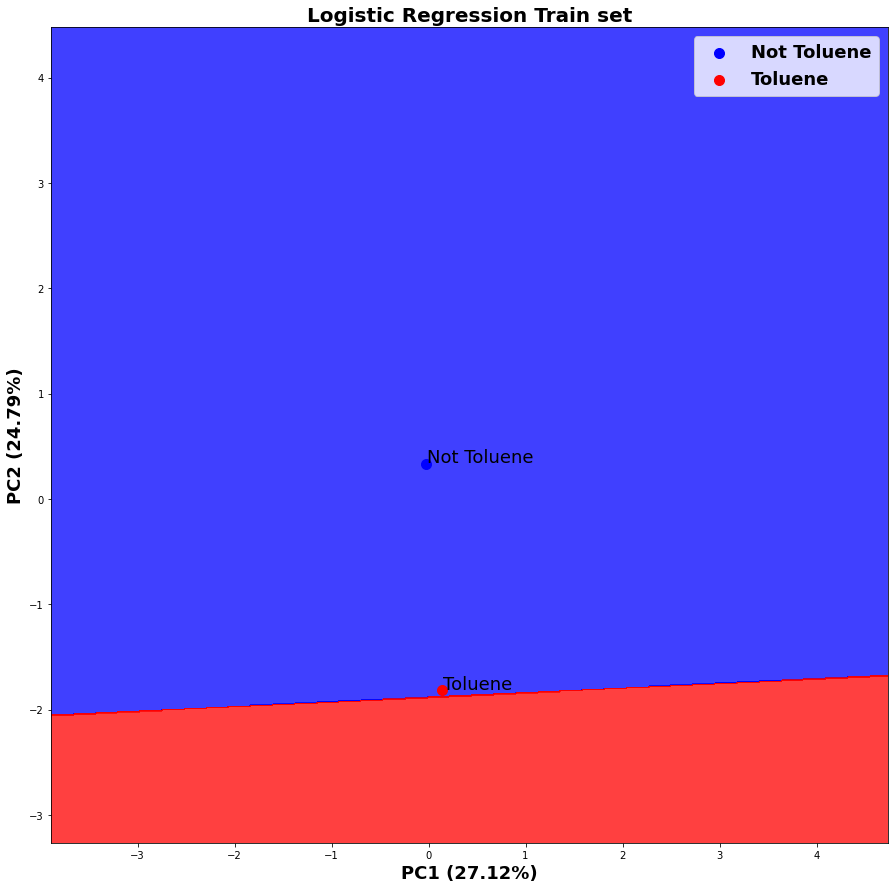

In [194]:


two_d_contour_with_points(X_train_lr, y_train_lr,
                          classifier_lr, "Train", explained_variance_lr)


# KNN

In [195]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier()


In [196]:
X_train_knn = X_train
X_test_knn = X_test
y_train_knn = y_train
y_test_knn = y_test


In [197]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_knn = sc.fit_transform(X_train_knn)
X_test_knn = sc.transform(X_test_knn)


In [198]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_knn = PCA(n_components=2)

X_train_knn = pca_knn.fit_transform(X_train_knn)
X_test_knn = pca_knn.transform(X_test_knn)

explained_variance_knn = pca_knn.explained_variance_ratio_


In [199]:
print(explained_variance_knn)


[0.27123849 0.24791378]


In [200]:
classifier_knn.fit(X_train_knn, y_train_knn)


KNeighborsClassifier()

In [201]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_knn = classifier_knn.predict(X_test_knn)


In [202]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test_knn, y_pred_knn)


In [203]:
cm_knn


array([[22059,     0],
       [    0,  4165]], dtype=int64)

In [204]:
from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y_test_knn, y_pred_knn)
print("Accuracy obtained from KNN " + str(round(accuracy_knn*100,5))+"%")

Accuracy obtained from KNN 100.0%


C:\Users\hp\AppData\Local\Temp\ipykernel_16188\1721301729.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0], centroid[1],


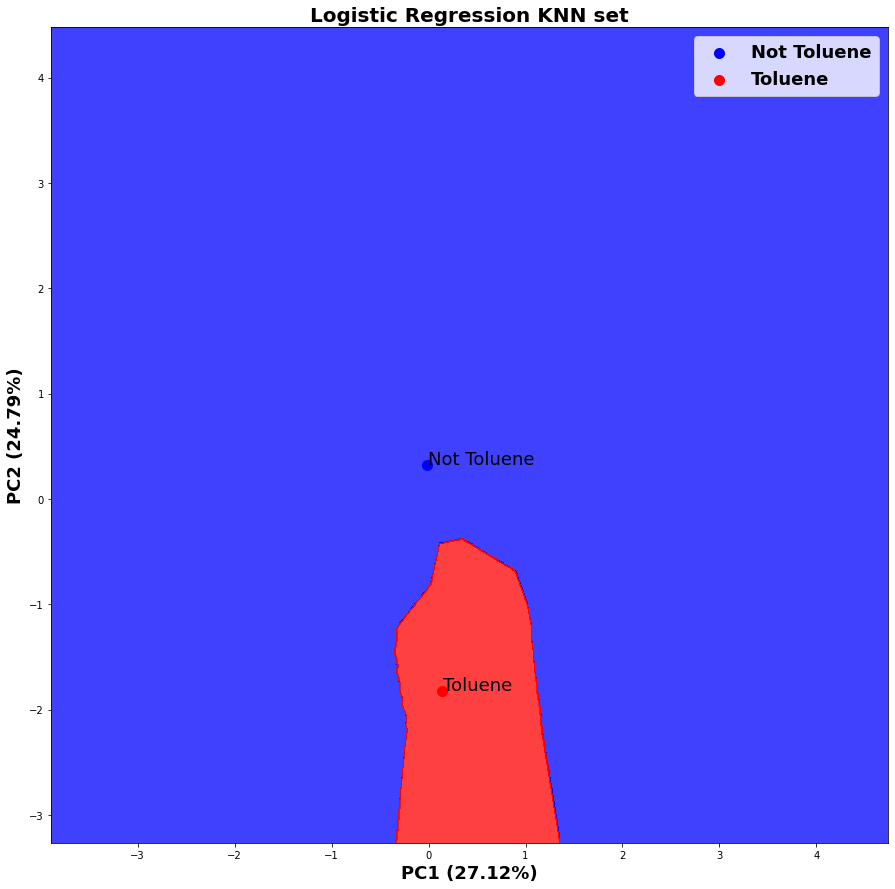

In [205]:
two_d_contour_with_points(X_test_knn, y_test_knn, classifier_knn,"KNN",explained_variance_knn)


# two_d_contour_with_points(X_train_lr, y_train_lr,
#                           classifier_lr, "Train", explained_variance_lr)


# Gaussian Naive Bayes

In [206]:
from sklearn.naive_bayes import GaussianNB

classifier_nb = GaussianNB(var_smoothing=1e-6)


In [207]:
X_train_nb = X_train
X_test_nb = X_test
y_train_nb = y_train
y_test_nb = y_test


In [208]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_nb = sc.fit_transform(X_train_nb)
X_test_nb = sc.transform(X_test_nb)


In [209]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_nb = PCA(n_components=2)

X_train_nb = pca_nb.fit_transform(X_train_nb)
X_test_nb = pca_nb.transform(X_test_nb)

explained_variance_nb = pca_nb.explained_variance_ratio_


In [210]:
print(explained_variance_nb)


[0.27123849 0.24791378]


In [211]:
classifier_nb.fit(X_train_nb, y_train_nb)

GaussianNB(var_smoothing=1e-06)

In [212]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_nb = classifier_nb.predict(X_test_nb)


In [213]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_test_nb, y_pred_nb)


In [214]:
cm_nb


array([[20775,  1284],
       [    0,  4165]], dtype=int64)

In [215]:
from sklearn import metrics

accuracy_nb = metrics.accuracy_score(y_test_nb, y_pred_nb)
print("Accuracy obtained from Gaussian Naive Bayes " + str(round(accuracy_nb*100,5))+"%")

Accuracy obtained from Gaussian Naive Bayes 95.10372%


C:\Users\hp\AppData\Local\Temp\ipykernel_16188\1721301729.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0], centroid[1],


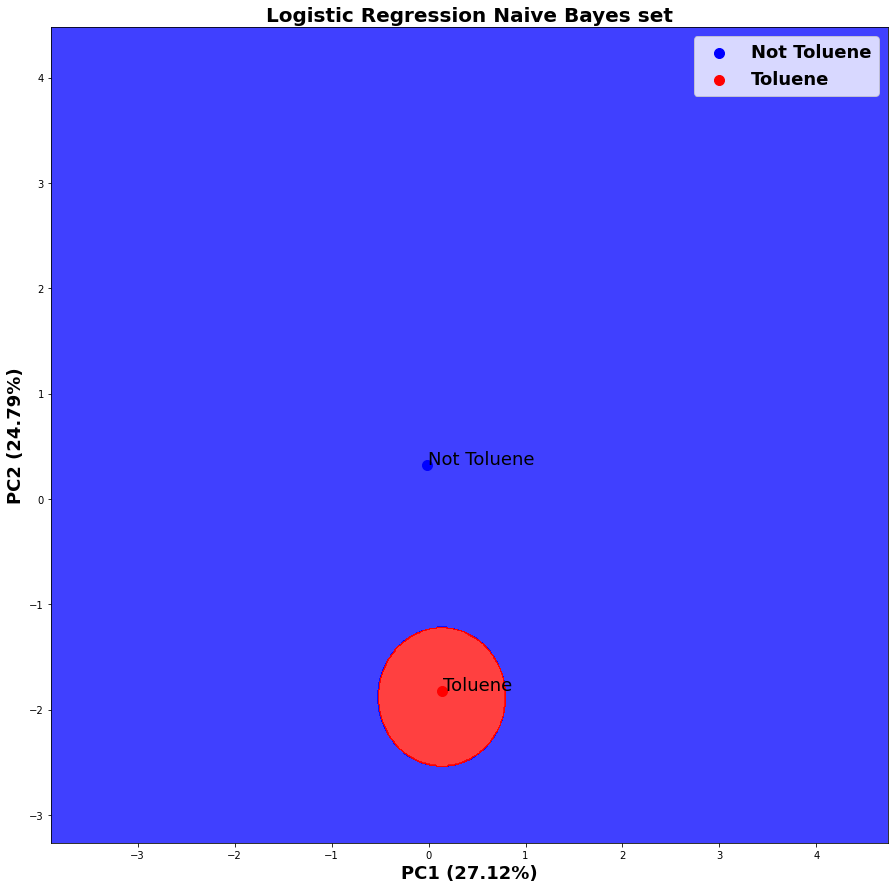

In [216]:
two_d_contour_with_points(X_test_nb, y_test_nb, classifier_nb, "Naive Bayes",explained_variance_nb)

# Random Forest

In [217]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=100)


In [218]:
X_train_rf = X_train
X_test_rf = X_test
y_train_rf = y_train
y_test_rf = y_test


In [219]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_rf = sc.fit_transform(X_train_rf)
X_test_rf = sc.transform(X_test_rf)


In [220]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_rf = PCA(n_components=2)

X_train_rf = pca_rf.fit_transform(X_train_rf)
X_test_rf = pca_rf.transform(X_test_rf)

explained_variance_rf = pca_rf.explained_variance_ratio_


In [221]:
print(explained_variance_rf)


[0.27123849 0.24791378]


In [222]:
classifier_rf.fit(X_train_rf, y_train_rf)


RandomForestClassifier()

In [223]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_rf = classifier_rf.predict(X_test_rf)


In [224]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test_rf, y_pred_rf)


In [225]:
cm_rf


array([[22059,     0],
       [    0,  4165]], dtype=int64)

In [226]:
from sklearn import metrics

accuracy_rf = metrics.accuracy_score(y_test_rf, y_pred_rf)
print("Accuracy obtained from Random Forest " + str(round(accuracy_rf*100,5))+"%")

Accuracy obtained from Random Forest 100.0%


C:\Users\hp\AppData\Local\Temp\ipykernel_16188\1721301729.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0], centroid[1],


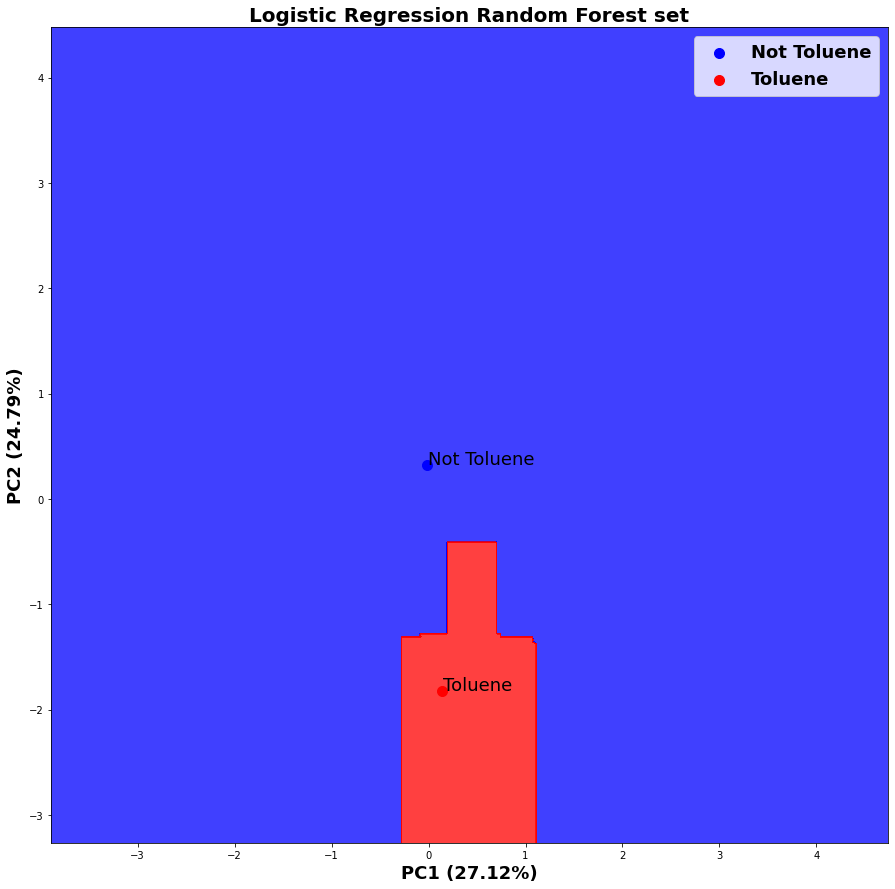

In [227]:
two_d_contour_with_points(X_test_rf, y_test_rf, classifier_rf, "Random Forest",explained_variance_rf)

# LDA

In [228]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

classifier_lda = LDA()


In [229]:
X_train_lda = X_train
X_test_lda = X_test
y_train_lda = y_train
y_test_lda = y_test


In [230]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_lda = sc.fit_transform(X_train_lda)
X_test_lda = sc.transform(X_test_lda)


In [231]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA

pca_lda = PCA(n_components=2)

X_train_lda = pca_lda.fit_transform(X_train_lda)
X_test_lda = pca_lda.transform(X_test_lda)

explained_variance_lda = pca_lda.explained_variance_ratio_


In [232]:
print(explained_variance_lda)


[0.27123849 0.24791378]


In [233]:
classifier_lda.fit(X_train_lda, y_train_lda)


LinearDiscriminantAnalysis()

In [234]:
# Predicting the test set result using
# predict function under LogisticRegression
y_pred_lda = classifier_lda.predict(X_test_lda)


In [235]:
# making confusion matrix between
#  test set of Y and predicted value.
from sklearn.metrics import confusion_matrix

cm_lda = confusion_matrix(y_test_lda, y_pred_lda)


In [236]:
cm_lda


array([[22059,     0],
       [ 4165,     0]], dtype=int64)

In [237]:
from sklearn import metrics

accuracy_lda = metrics.accuracy_score(y_test_lda, y_pred_lda)
print("Accuracy obtained from LDA: " + str(round(accuracy_lda*100,5))+"%")

Accuracy obtained from LDA: 84.1176%


C:\Users\hp\AppData\Local\Temp\ipykernel_16188\1721301729.py:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0], centroid[1],


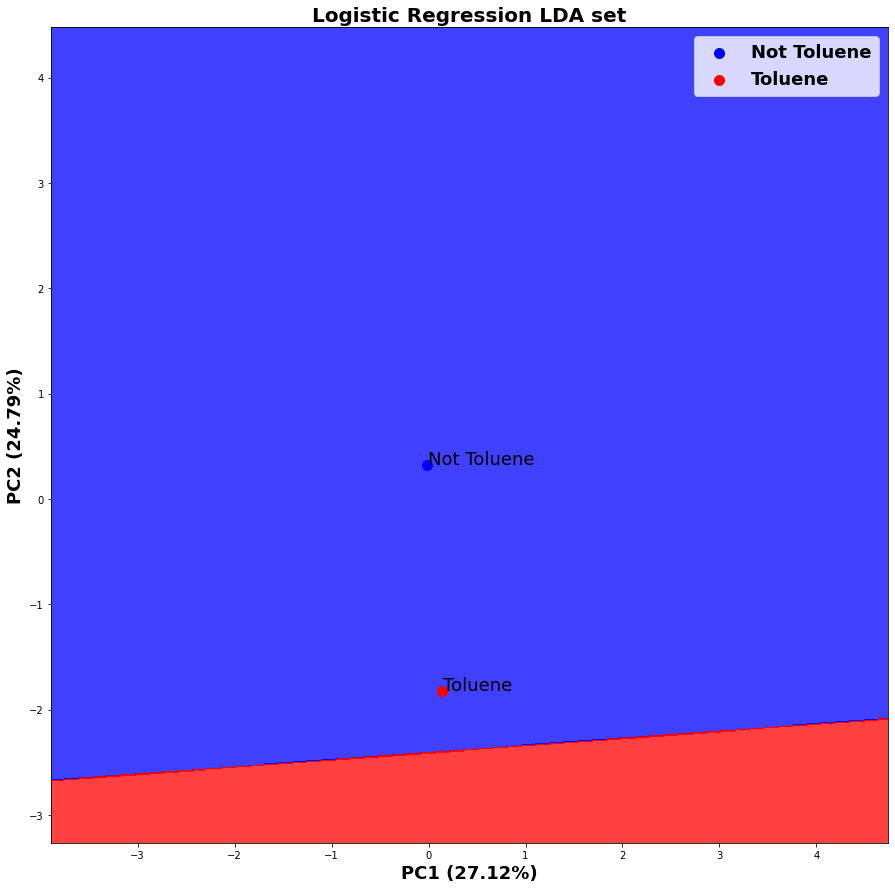

In [238]:
two_d_contour_with_points(X_test_lda, y_test_lda,  classifier_lda, "LDA",explained_variance_lda)